**Import packages**

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import dst_tools
import plotting
import utils

**Download new Twitter data and analyze sentiment, so it's available locally**

In [3]:
utils.update_all()

Updating data using query: #dkøko OR #aktier OR #dkbizz OR #dkoko OR #dkbiz OR #arbejde OR #arbejdsmarked OR #danskøkonomi OR #dkfinans OR #dkfin OR #businessdk.
Going to save to C:\projects\twitter_sentiment_indicator\data\twitter.p.
Querying 2 periods: [('2021-05-21', None), ('2010-01-01', '2010-01-28')].
Querying period from 2021-05-21 to now.
Dropped 64 duplicate Tweet IDs.
Reached date: 2021-05-21. Downloaded 509097 tweets total.
Done.
Querying period from 2010-01-01 to 2010-01-28.
Done.
Assigning sentiment scores to 1 tweets.
Done!


**Read in the Twitter-sentiment and download consumer trust from DST.**

In [4]:
# Read in Twitter + tweet sentiment data
df_sentiment = utils.read_twitter_sentiment()
df_sentiment.head()

,date,month,tweet_id,content,sentiment,n_words,adjusted_sentiment,isnegative,sentiment_z,adjusted_sentiment_z,datetime
375337,2016-01-01,2016-01,682842273491595264,Der bliver et Uber-hedt 2016 for #fagbevægelse...,1.0,15,0.066667,False,0.226312,0.251399,2016-01-01
375332,2016-01-01,2016-01,682878783825797120,.@MLundbyHansen @politikodk Hvorfor afskaffer ...,-1.0,14,-0.071429,False,-0.650914,-0.546465,2016-01-01
375331,2016-01-01,2016-01,682885856651292672,Lämnar ett hyfsat 2015 och ser fram emot ett s...,0.0,16,0.000000,False,-0.212301,-0.133777,2016-01-01
375330,2016-01-01,2016-01,682886002231349248,"Er lidt glad for, at det ikke er hver dag jeg ...",3.0,25,0.120000,False,1.103539,0.559539,2016-01-01
375329,2016-01-01,2016-01,682886299301351425,Nytårsforsæt. Opgør med de facto monopol på br...,0.0,17,0.000000,False,-0.212301,-0.133777,2016-01-01


In [5]:
# Download consumer trust data from DST
df_cti = dst_tools.get_consumer_trust()
df_cti.head()

,cti,datetime,date,timestamp,cti_z
495,4.6,2016-01-15,2016-01-15,1.452816e+12,0.328518
496,4.0,2016-02-15,2016-02-15,1.455494e+12,0.208778
497,3.6,2016-03-15,2016-03-15,1.458000e+12,0.128951
498,5.5,2016-04-15,2016-04-15,1.460678e+12,0.508128
499,3.2,2016-05-15,2016-05-15,1.463270e+12,0.049124


**Make some plots etc**

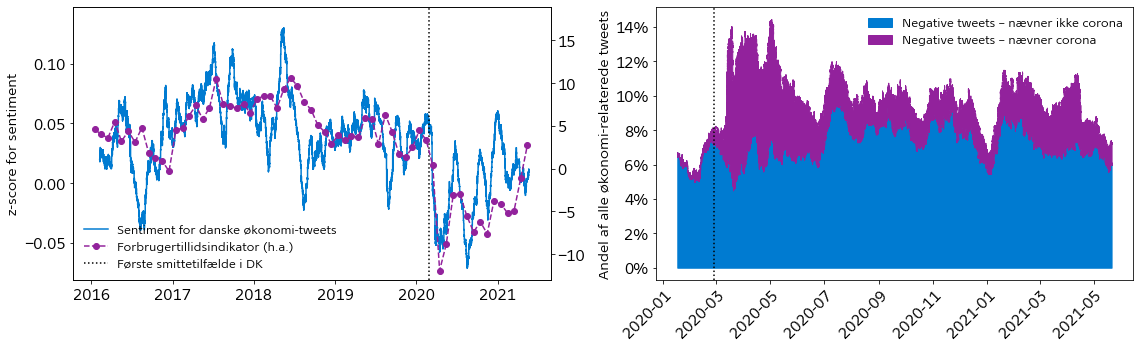

In [7]:
fig, _ = plotting.plot_covid_impact(df_sentiment, df_cti)